# Dataset Overview

### Load Packages

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# custom plot
from sbcustom import *

### Set Options

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 13

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

### Load dataset

In [3]:
car = pd.read_csv('train-data.csv')

Shape of data

In [4]:
print('Shape of data: ', car.shape)

Shape of data:  (6019, 14)


Few observations

In [5]:
car.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74


In [6]:
car.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

Feature Statistics Summary

In [7]:
car.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.00,6019.00,6019.00,5977.00,6019.00
mean,3009.00,2013.36,58738.38,5.28,9.48
std,1737.68,3.27,91268.84,0.81,11.19
min,0.00,1998.00,171.00,0.00,0.44
25%,1504.50,2011.00,34000.00,5.00,3.50
50%,3009.00,2014.00,53000.00,5.00,5.64
75%,4513.50,2016.00,73000.00,5.00,9.95
max,6018.00,2019.00,6500000.00,10.00,160.00


해당 데이터를 관찰하였을 떄, Unnamed: 0 열은 필요가 없어보임

Name열은 제조사와 자동차의 모델을 알려주는데, 너무 길고, unique한 값들이 많아보임.

따라서 Name은 처리를 통해 제조사를 표현하도록 변경

Mileage, Engine, Power열은 수치형 데이터이지만, object로 표현되어있고, 단위가 포함되어있어 처리가 필요해보임.

object 타입에서 각각 int형 혹은 float형으로 변경

# EDA

In [8]:
car.drop(['Unnamed: 0'], axis=1, inplace=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,NaN,2.65


결측치에 대한 확인

In [9]:
car.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

결측치를 확인하였을 떄, New_Price열에 대한 결측치는 5195개로, 전체 데이터의 86%에 해당함.

따라서 해당 열은 평균값으로 대체한다고 해도 원하는 예측을 할 수 없을 것으로 판단되어, 삭제하도록 함.

Engine열에 대한 결측치는 36개로, 전체 데이터의 0.6%에 해당함.

Power열에 대한 결측치는 36개로, 전체 데이터의 0.6%에 해당함.

Seats열에 대한 결측치는 42개로, 전체 데이터의 0.7%에 해당함.

평균값으로 대체하는 방법도 있겠지만, 우선 결측치는 제거하고 분석진행

In [10]:
car.drop(['New_Price'], axis=1, inplace=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,2.65


In [11]:
car.dropna(inplace=True)
car = car.reset_index(drop=True)

In [12]:
names = list(car.Name)
for i in range(len(names)):
    names[i] = names[i].split()[0]
car.Name = names
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,2.65


Name열을 제조사별로 표현

In [13]:
mileages = list(car.Mileage)
for i in range(len(mileages)):
    mileages[i] = mileages[i].split(' ', 1)[0]
car.Mileage = mileages
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.00,2.65


In [14]:
engines = list(car.Engine)
for i in range(len(engines)):
    engines[i] = engines[i].split(' ', 1)[0]
car.Engine = engines
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16 bhp,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74 bhp,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71 bhp,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112 bhp,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1 bhp,5.00,2.65


In [15]:
powers = list(car.Power)
for i in range(len(powers)):
    powers[i] = powers[i].split(' ', 1)[0]
car.Power = powers
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.00,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.00,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.00,2.65


Mileage, Engine, Power에 대한 단위 제거

In [16]:
car['Mileage'] = car['Mileage'].astype(float)
car['Engine'] = car['Engine'].astype(int)

Power 대한 자료형 변경 도중 에러 발생

이유는 Power값에 'null bhp'라는 값이 존재하기 때문

In [17]:
null_count = 0
null_position = []
for i in range(len(car.Power)):
    if car.Power[i] == 'null':
        null_count += 1
        null_position.append(i)
print('Number of null values: ', null_count)

Number of null values:  103


'null bhp'로 표현되어 있는 행 제거

In [18]:
car = car.drop(car.index[null_position])
car = car.reset_index(drop=True)
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.00,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.00,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.00,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74,5.00,4.75
5868,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71,5.00,4.00
5869,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112,8.00,2.90
5870,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.1,5.00,2.65


In [19]:
car['Power'] = car['Power'].astype(float)

성공적으로 수행 가능

In [20]:
# car['Year'] = pd.Categorical(car['Year'])
car['Seats'] = car['Seats'].astype(int)
car['Seats'] = pd.Categorical(car['Seats'])

Year과 Seats에 대해 Categorical type으로 변경

Seats는 좌석 수를 의미하므로 int형으로 변경

In [21]:
car['Owner_Type'] = pd.Categorical(
    car['Owner_Type'],
    categories=['First', 'Second', 'Third', 'Fourth & Above'],
    ordered=True
)

# Visualization

어떤 변수가 Price에 영향을 많이 미치는지 확인하기 위해서 시각화를 진행

우선 가격대의 경향부터 확인

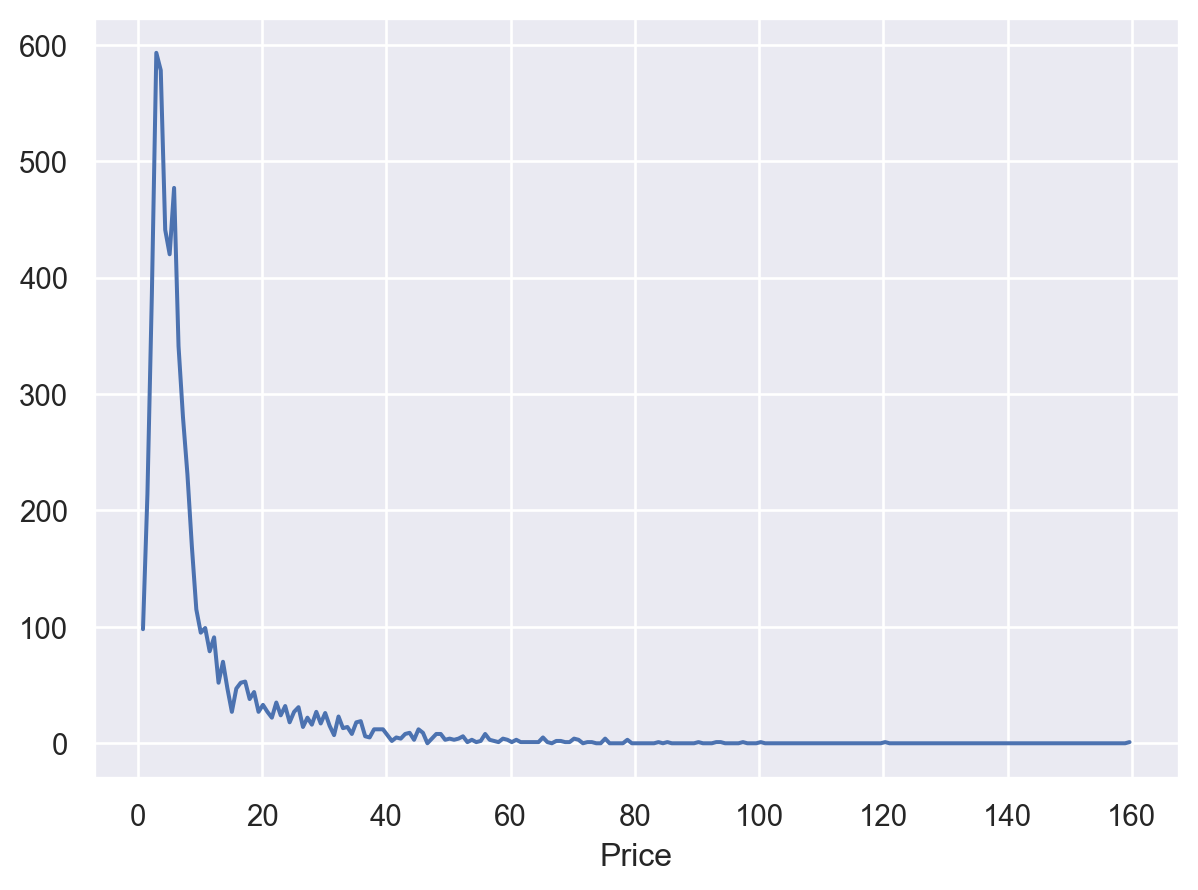

In [22]:
(
    so.Plot(car, x='Price')
    .add(so.Line(), so.Hist())
)

경향을 확인한 결과 가격대가 높아질수록 데이터의 수가 줄어드는 것을 확인할 수 있음

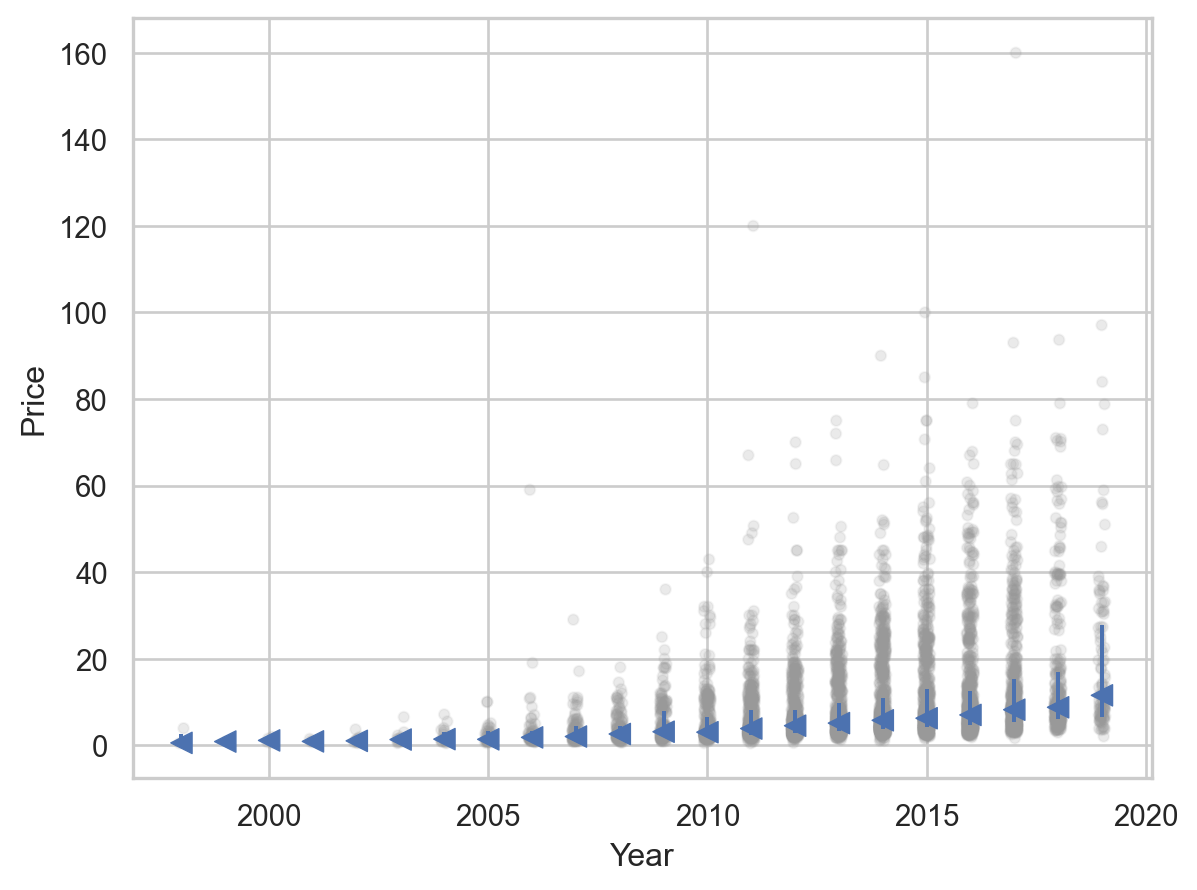

In [23]:
boxplot(car, 'Year', 'Price')

연도와 가격대의 관계를 확인했을 때, 연식이 낮아질수록 (최근에 생산된 자동차일수록) 가격대가 높아지는 경향을 확인할 수 있음

따라서 가격과 연도와의 관계가 있어보임

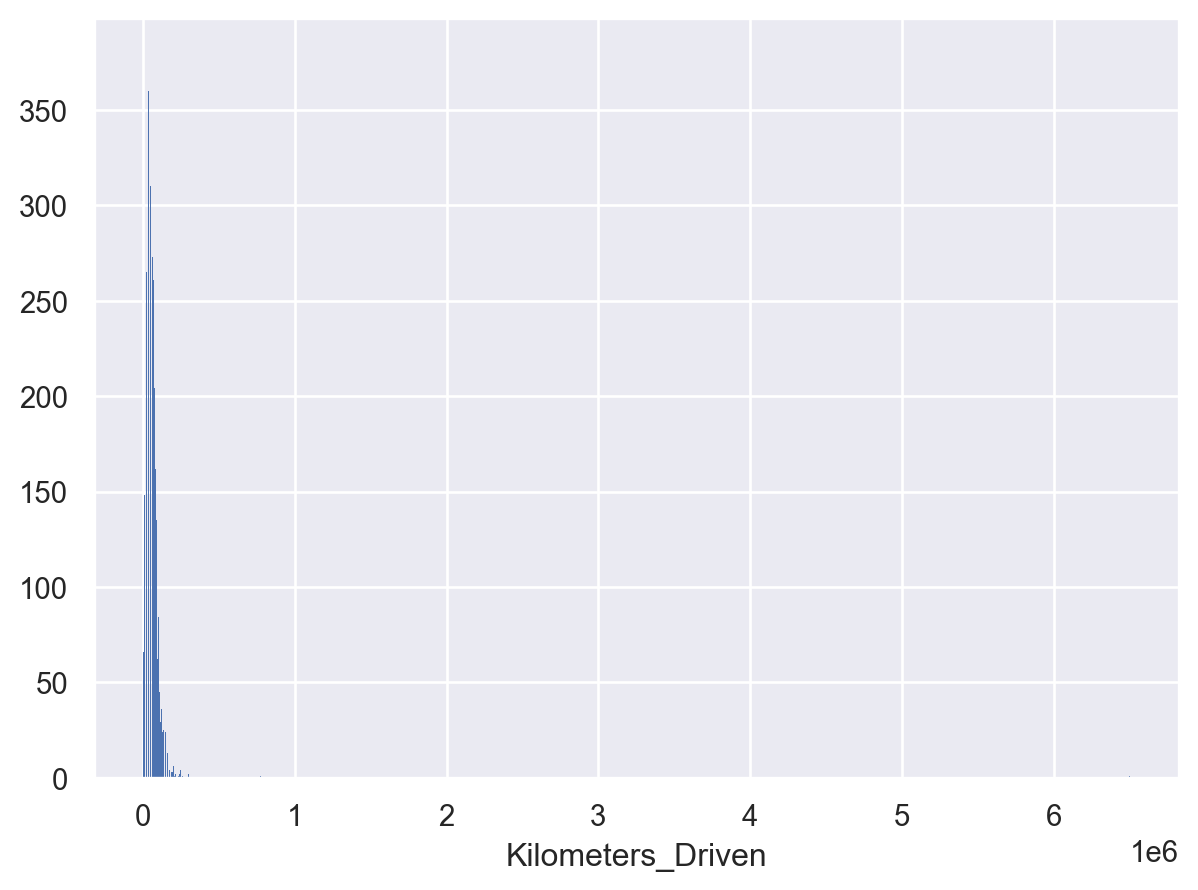

In [24]:
(
    so.Plot(car, x='Kilometers_Driven')
    .add(so.Bar(), so.Hist())
)

Kilometers_Driven과 Price의 관계를 확인하게 위해 시각화를 진행한 결과

Kilometers_Driven의 값이 좌편향된 경향을 보임

따라서 log scale을 취하여 분석

In [25]:
car = car.assign(lKilometers = np.log(car.Kilometers_Driven))

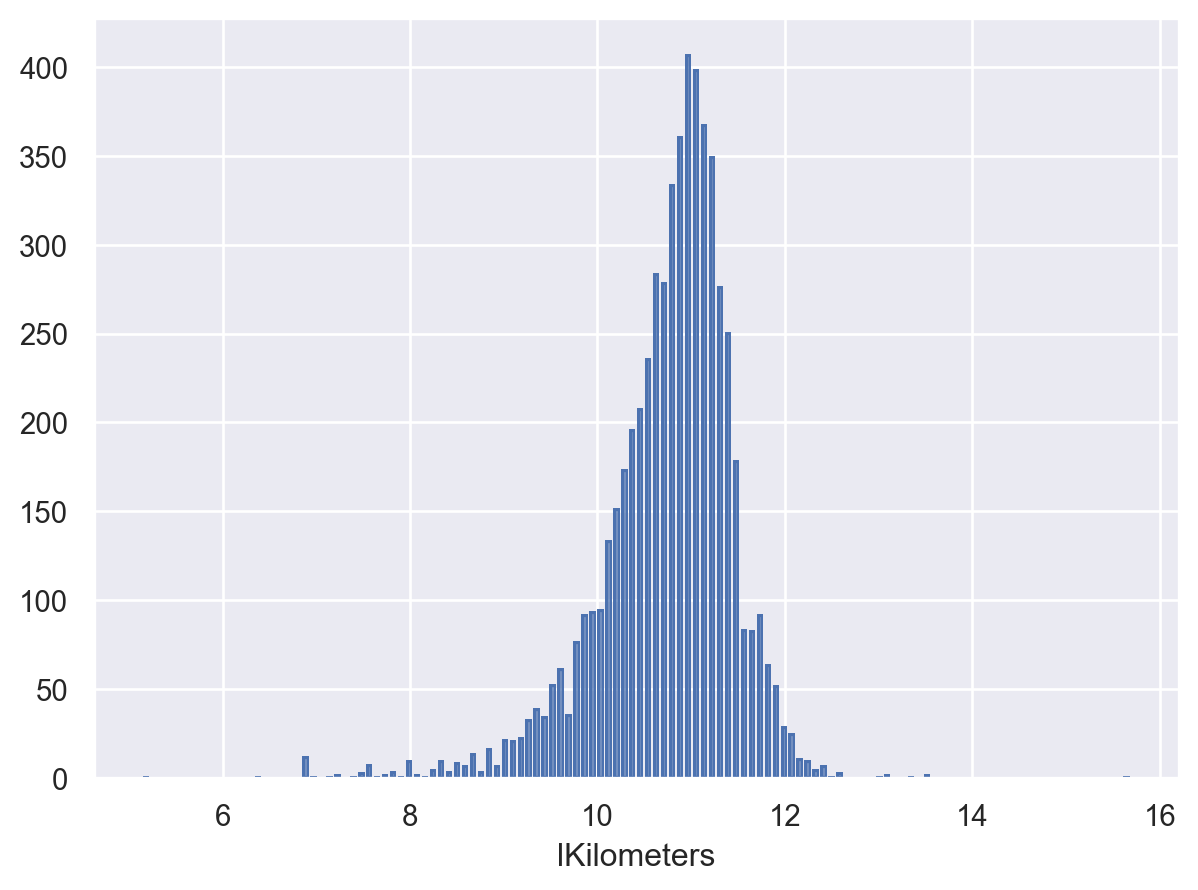

In [26]:
(
    so.Plot(car, x='lKilometers')
    .add(so.Bar(), so.Hist())
)

log scale을 한 결과 lKilometers의 값은 특정 구간내에 존재하는 것을 확인할 수 있음

log scale을 한 값이 10~12사이에 존재

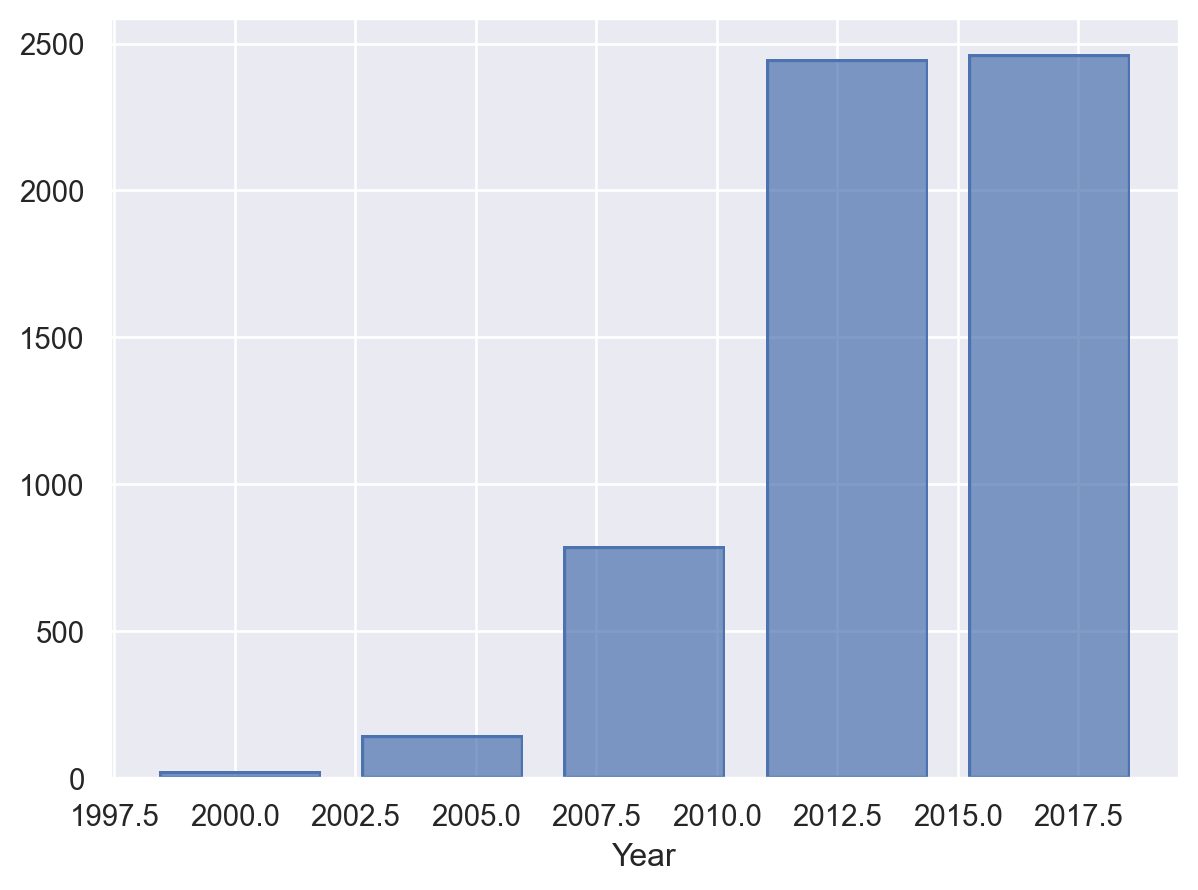

In [27]:
(
    so.Plot(car, x='Year')
    .add(so.Bar(), so.Hist(bins=5))
)

Year은 오른쪽으로 치우쳐진 모습을 볼 수 있음

즉, 중고차를 구매하는 사람들은 최신식 자동차를 선호하는 것을 알 수 있음

왜 최신식 자동차를 선호하는지 알아보기 위해 lKilometers와 Year의 관계를 비교

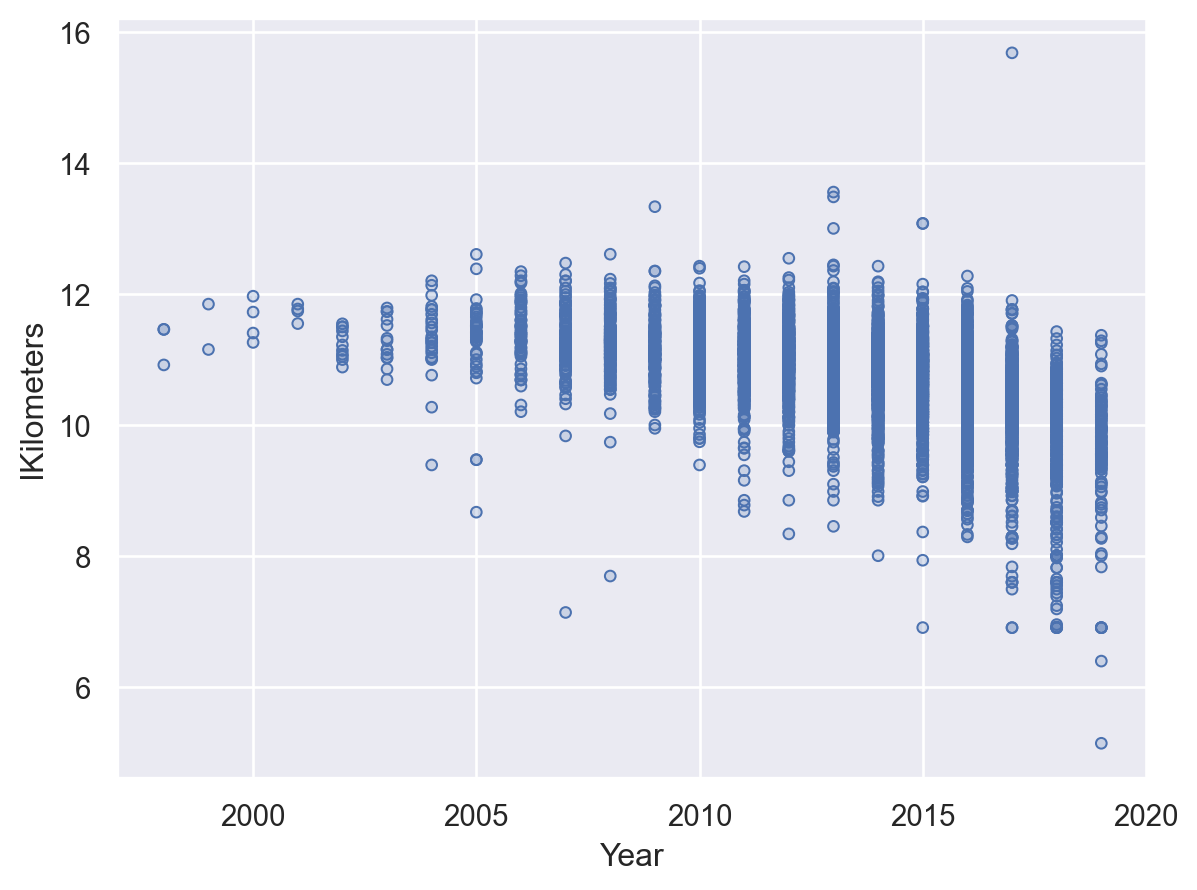

In [28]:
(
    so.Plot(car, x='Year', y='lKilometers')
    .add(so.Dots())
)

보통 최신식 자동차일수록 주행거리가 적은 것을 확인할 수 있음

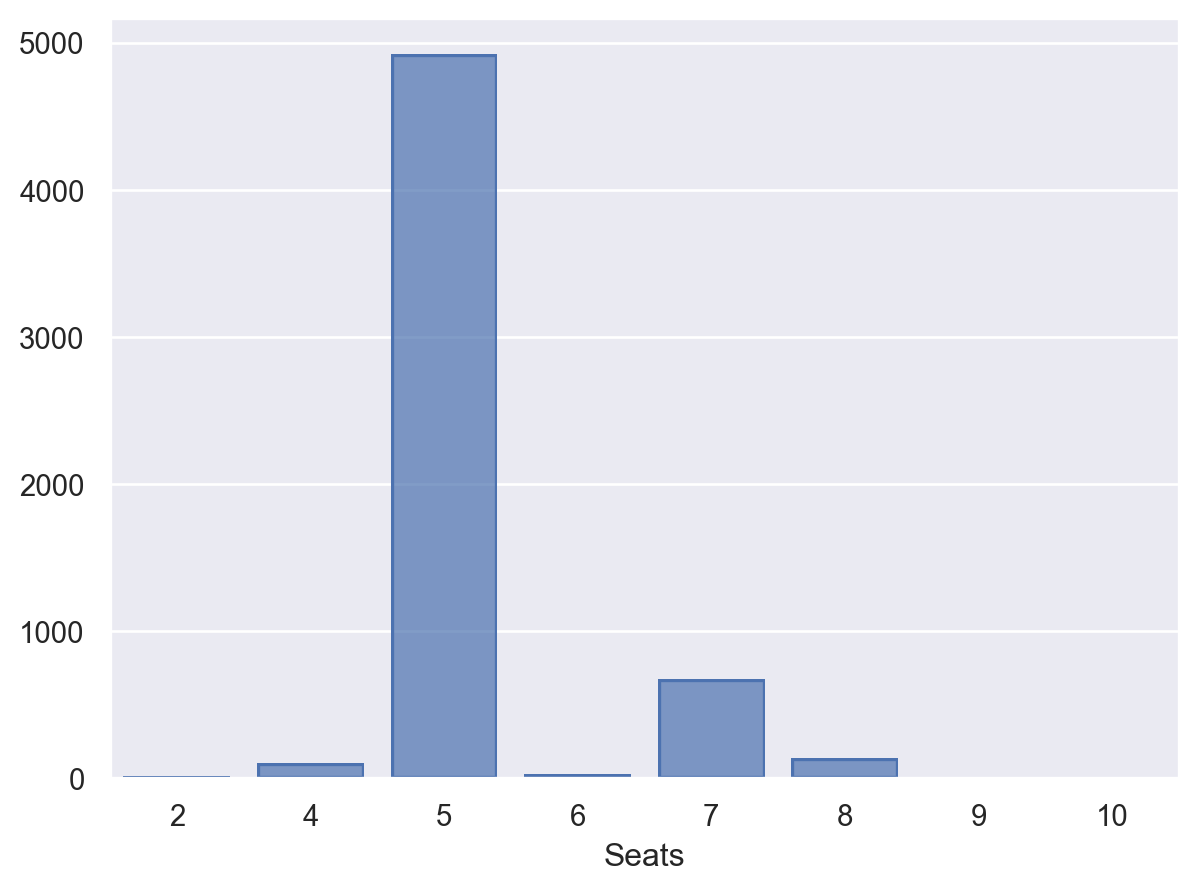

In [29]:
(
    so.Plot(car, x='Seats')
    .add(so.Bar(), so.Hist())
)

좌석이 5개인 차량을 선호하는 경향이 있음

대부분의 자동차가 좌석이 5개인 것을 감안

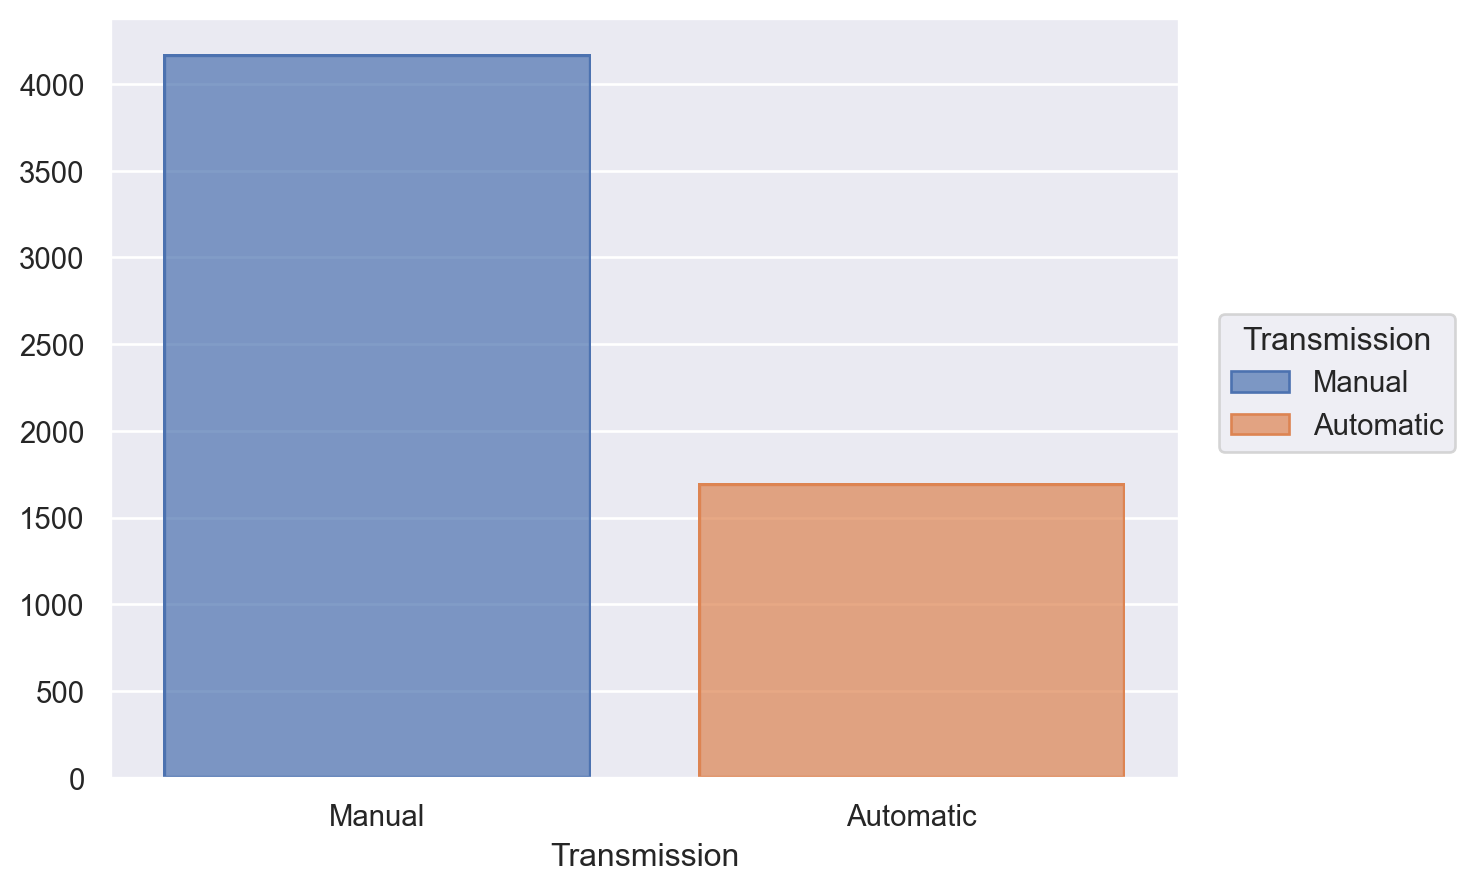

In [30]:
(
    so.Plot(car, x='Transmission', color='Transmission')
    .add(so.Bar(), so.Hist())
)

Automatic보다 Manual 자동차를 선호하는 경향이 있음

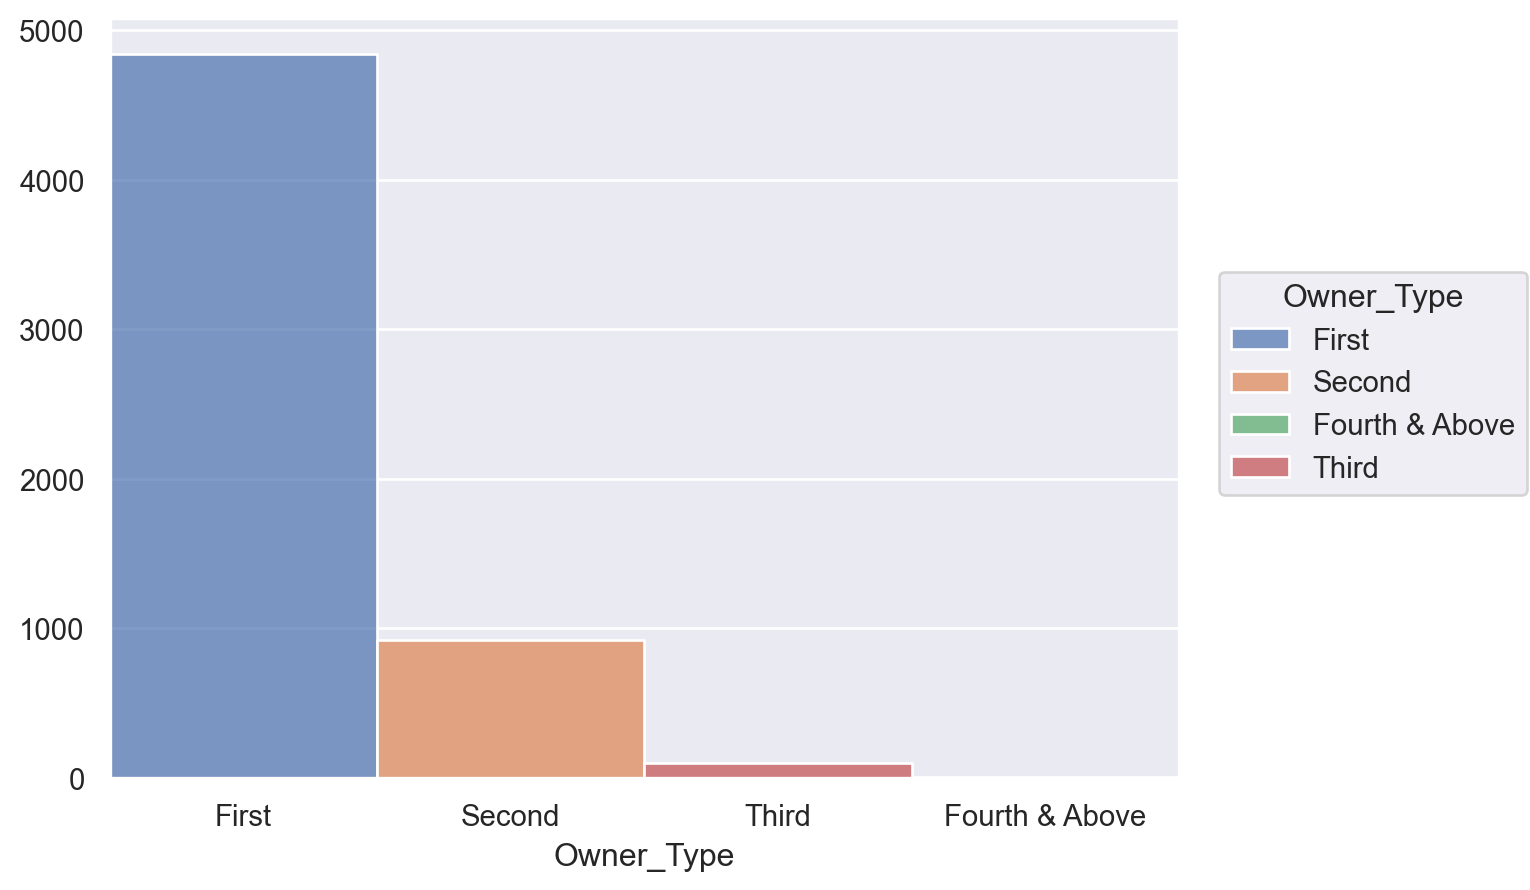

In [31]:
(
    so.Plot(car, x='Owner_Type', color='Owner_Type')
    .add(so.Bars(), so.Hist())
)

해당 자동차를 운행한 주인이 1명인 자동차를 선호하는 경향이 있음

이는 최신식 자동차일 수록 중고차로 나올 때, 주인이 1명인 경우가 많기 때문으로 추측

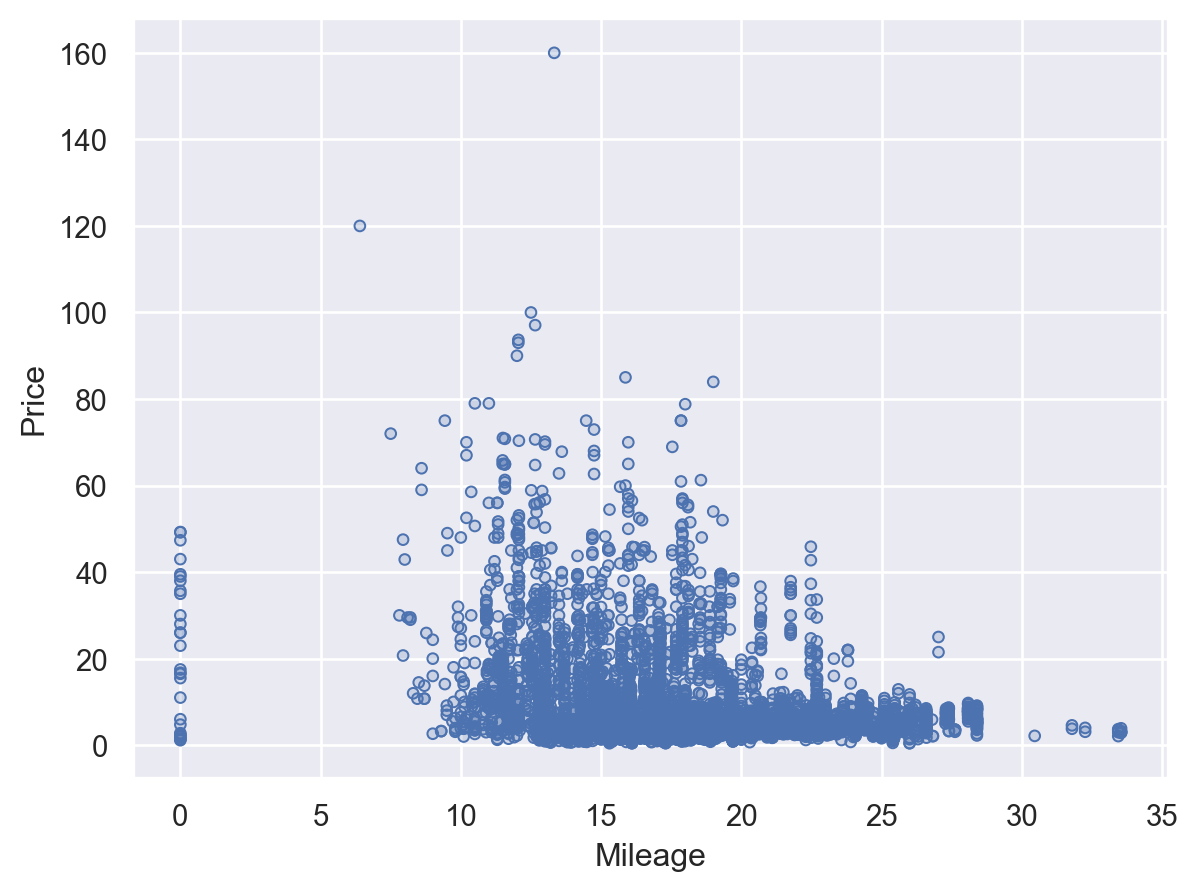

In [32]:
(
    so.Plot(car, x='Mileage', y='Price')
    .add(so.Dots())
)

Mileage와는 상관관계는 큰 관계가 없어보인다

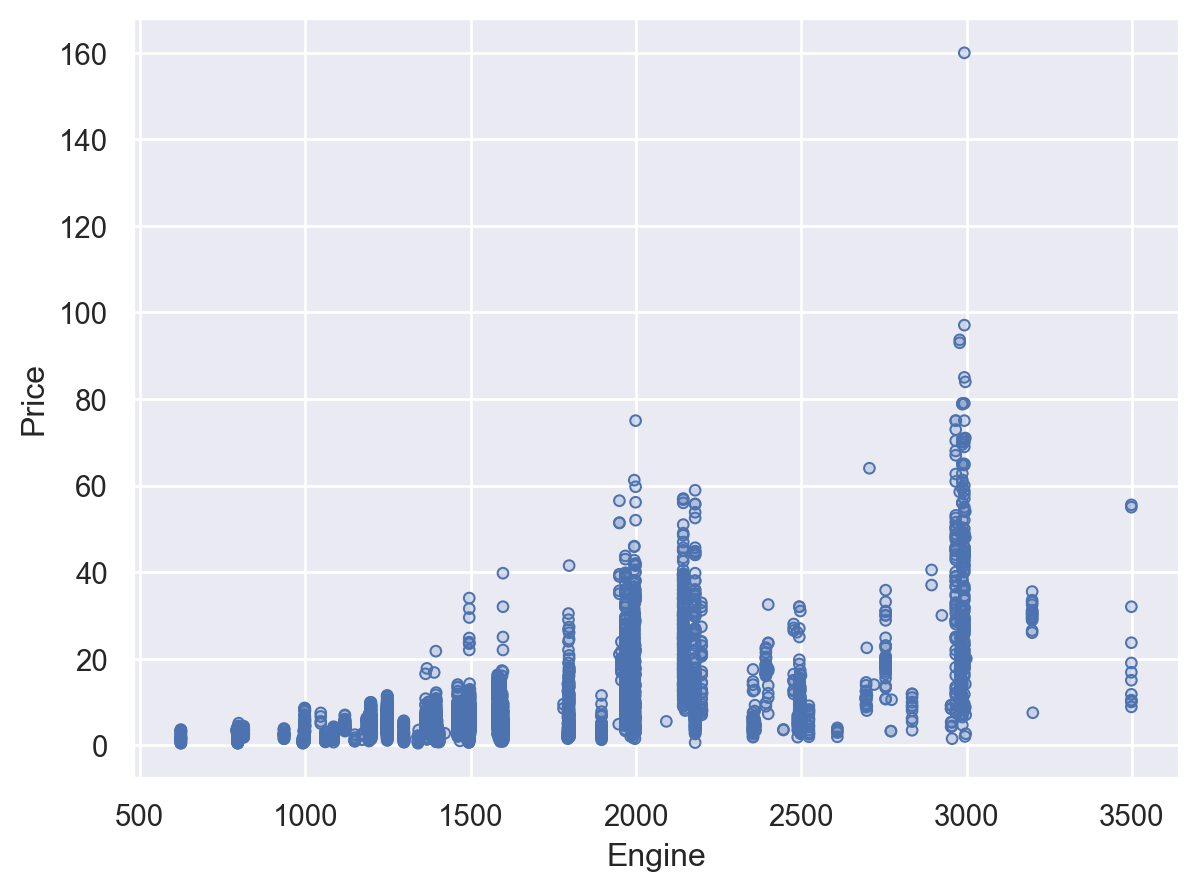

In [33]:
(
    so.Plot(car.query('Engine < 3500'), x='Engine', y='Price')
    .add(so.Dots())
)

Engine을 3500이하의 값으로 제한하였을 때, Engine이 커질수록 가격이 높아지는 경향을 보임

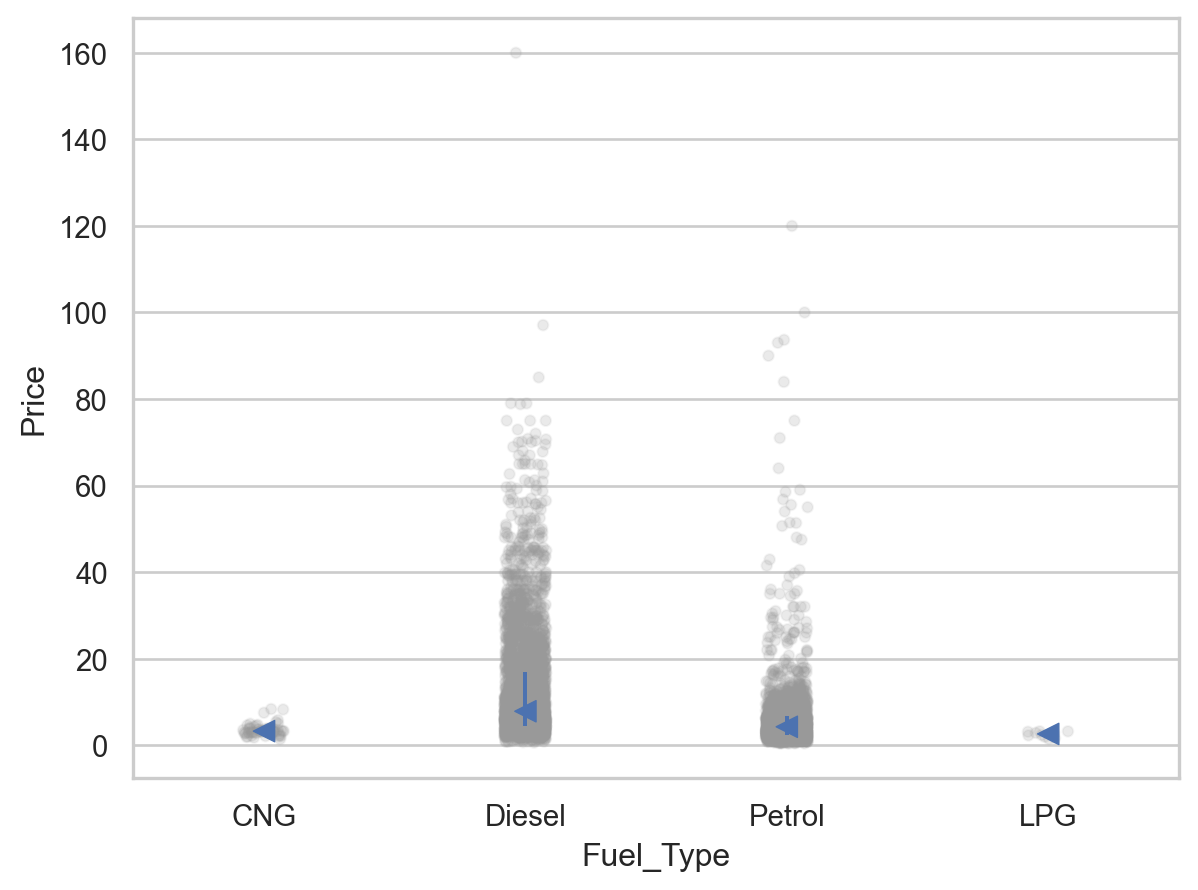

In [34]:
boxplot(car, 'Fuel_Type', 'Price')

Diesel과 Petrol의 비중이 높고, 평균 가격은 둘 중 disel이 더 높은편이다

연도별로 큰 경향을 살펴보기 위해 연도를 5개년으로 나누어 총 5개의 범위를 만들어 시각화를 진행

In [35]:
min_year = car['Year'].min()
max_year = car['Year'].max()
print('Min year: ', min_year)
print('Max year: ', max_year)

Min year:  1998
Max year:  2019


연식이 가장 많은 자동차는 1998년도에 생산되었으며, 연식이 가장 적은 자동차는 2019년에 생산되었음

In [36]:
bins = np.arange(min_year, max_year + 5, 5)

5개년의로 나누어 구간을 생성

In [37]:
car['Year_Binned'] = pd.cut(car['Year'], bins, include_lowest=True)
car['Year_Binned'] = car['Year_Binned'].apply(lambda x: (x.left + x.right) / 2).astype(int)

해당 구간으로 Year의 값을 나눈 뒤, 해당 구간의 평균값을 연도로 표현

In [38]:
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,lKilometers,Year_Binned
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75,11.18,2010
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50,10.62,2015
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50,10.74,2010
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00,11.37,2010
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74,10.61,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,74.00,5,4.75,10.22,2015
5868,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120,71.00,5,4.00,11.51,2015
5869,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498,112.00,8,2.90,10.92,2010
5870,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998,67.10,5,2.65,10.74,2010


해당 구간에 따른 lKilometers와 Price의 관계를 시각화

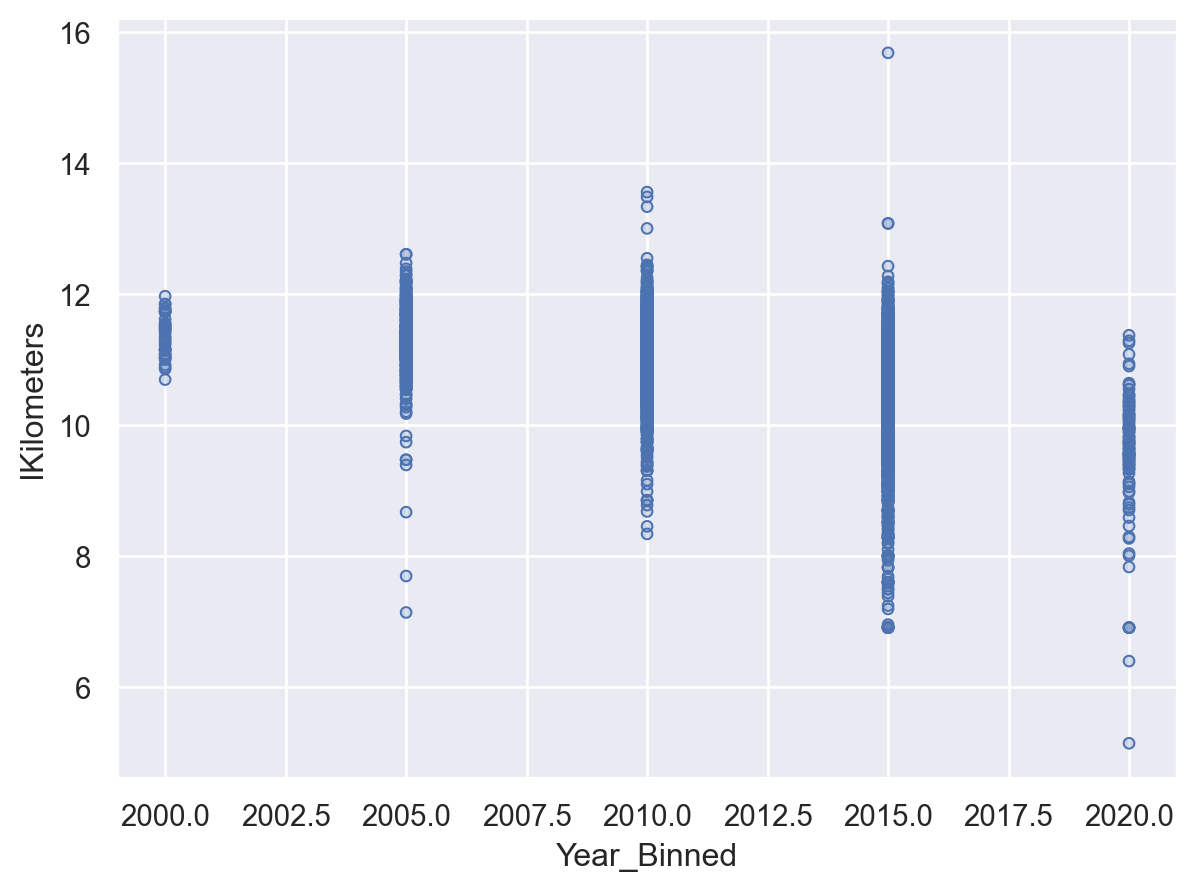

In [39]:
(
    so.Plot(car, x='Year_Binned', y='lKilometers')
    .add(so.Dots())
)

연식이 낮아질수록 즉, 연도가 증가할수록 주행거리가 적은 것을 확인할 수 있음

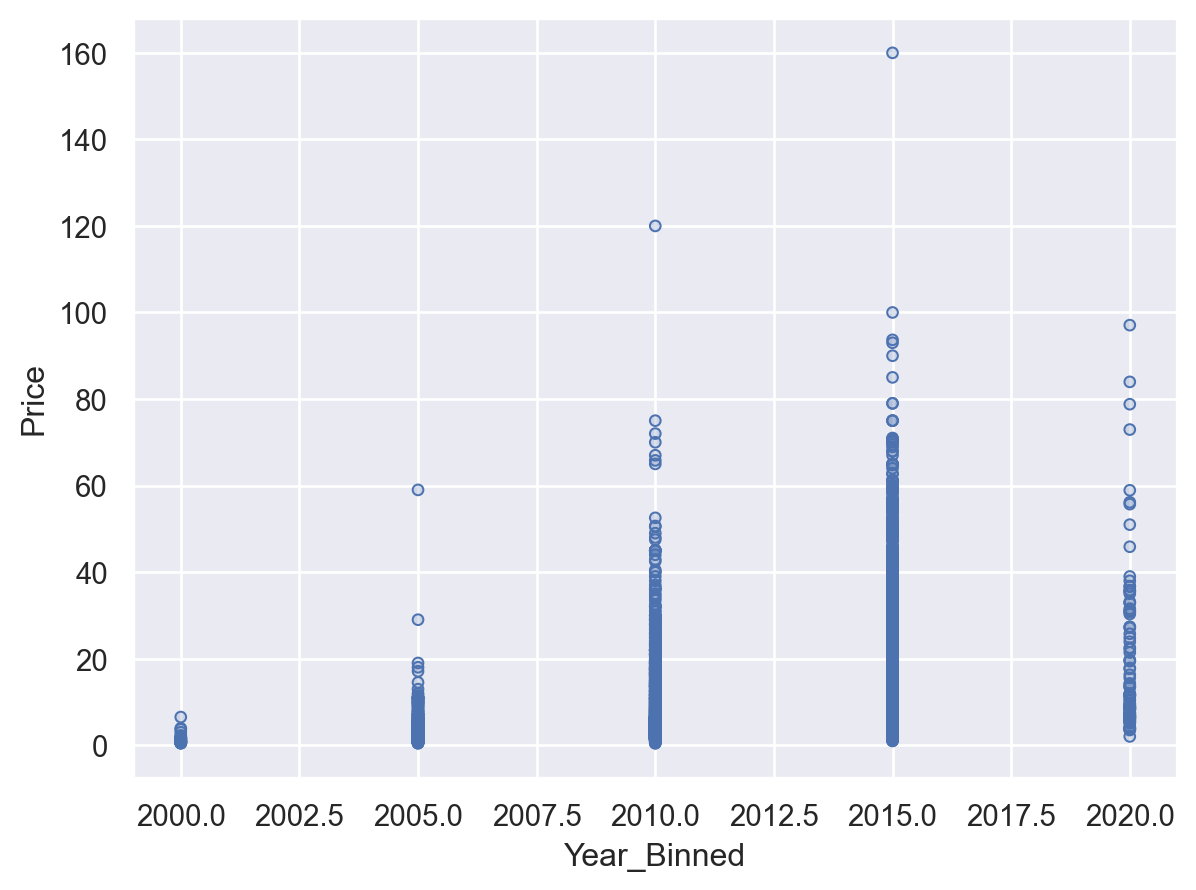

In [40]:
(
    so.Plot(car, x='Year_Binned', y='Price')
    .add(so.Dots())
)

임의로 5개의 연도를 한번에 묶어 확인해본 결과 연식이 낮아질수록 거리가 줄어드는 경향이 존재함

따라서 거리와 연식은 반비례하는 관계이므로 상관관계가 있음

또한 연도가 늘어날수록 자동차의 가격대가 높아지는 현상이 있으나 가장 최근인 2020년에는 가격대가 낮아짐

In [41]:
car.groupby('Year_Binned')['Price'].count().reset_index(name="count")

,Year_Binned,count
0,2000,38
1,2005,400
2,2010,2177
3,2015,3155
4,2020,102


상대적으로 2020년 즈음에 자동차의 양이 적어서 낮아졌다고 볼 수 있음

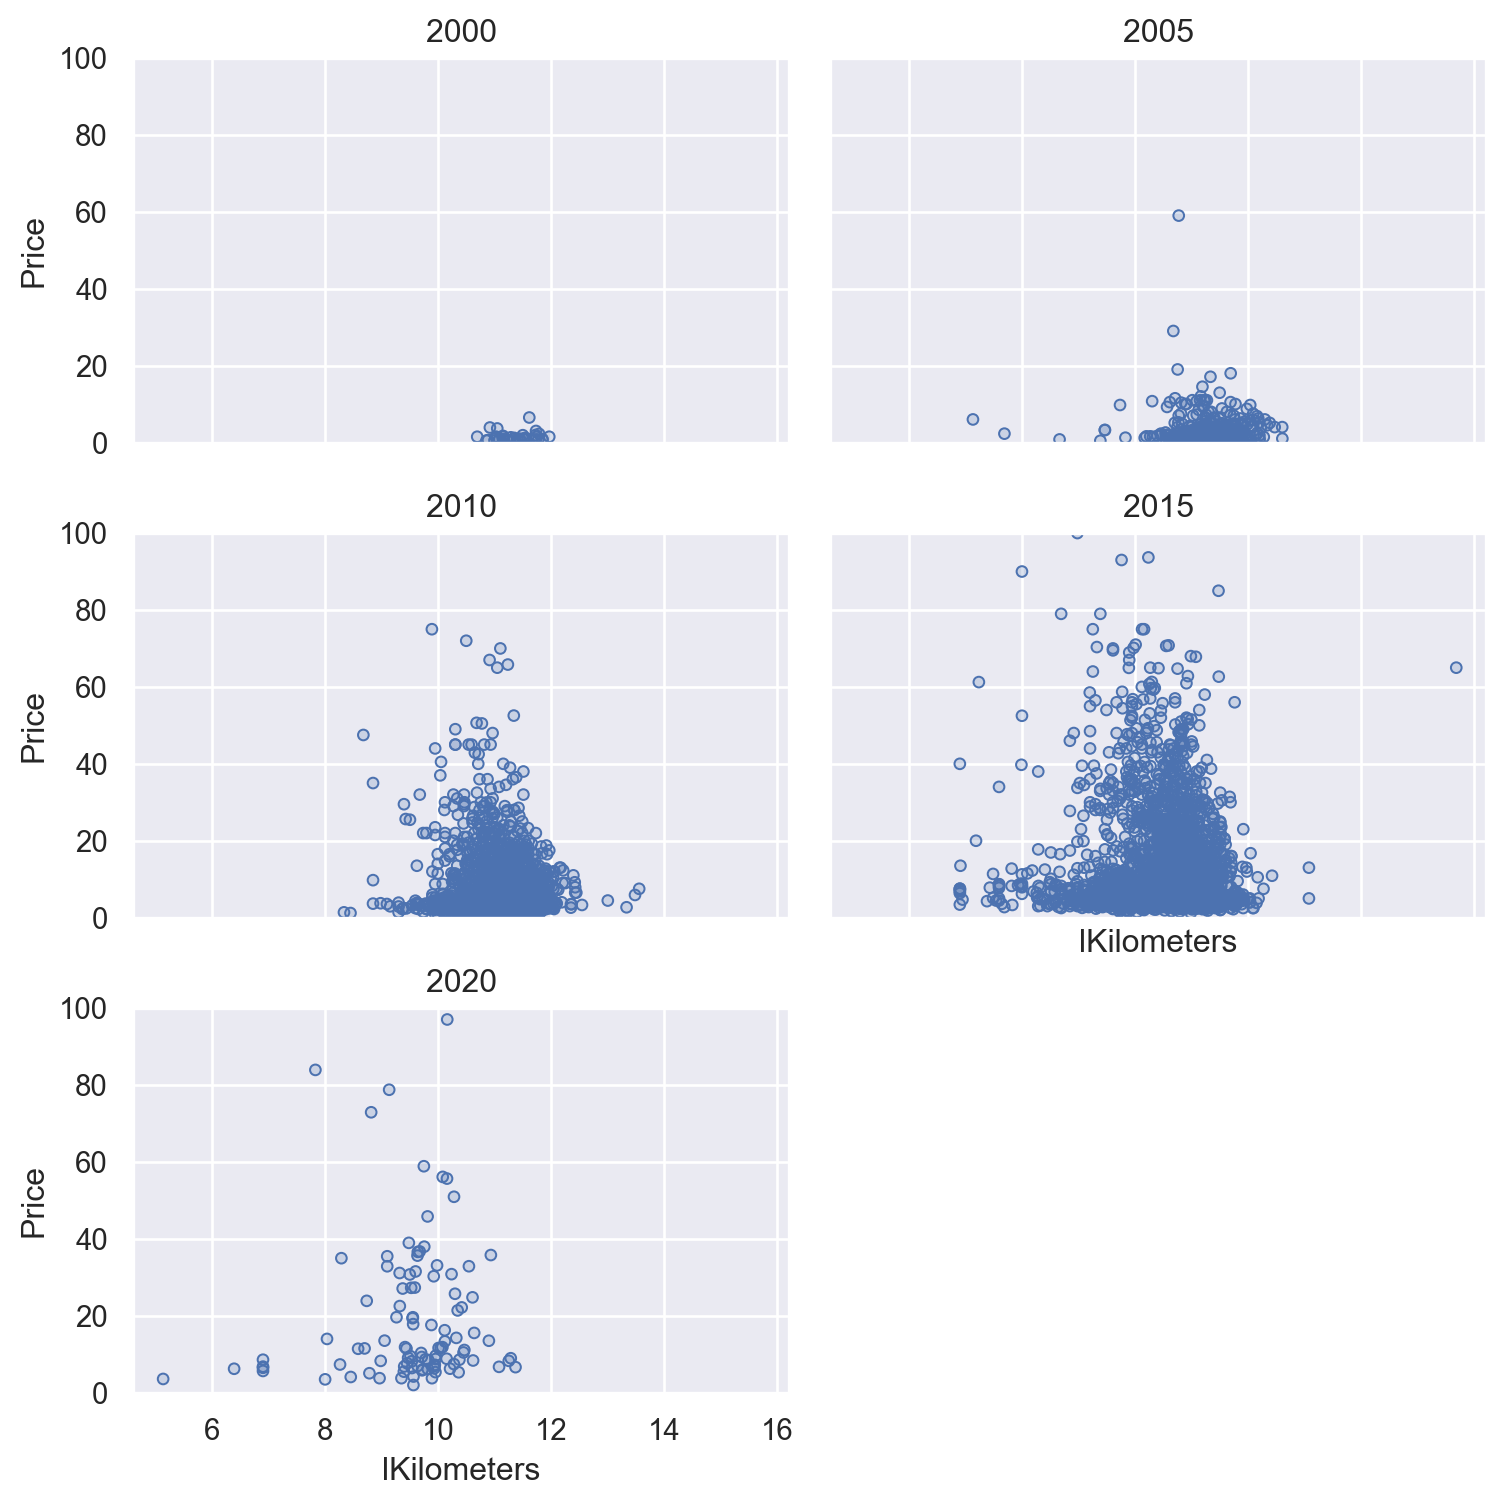

In [42]:
(
    so.Plot(car, x='lKilometers', y='Price')
    .facet('Year_Binned', wrap=2)
    .add(so.Dots())
    .layout(size=(8, 8))
    .limit(y=(0, 100))
)

Kilometer_Driven을 log scale한 값이 일정 범위인 8에서 12사이에 값이 몰려있음

In [43]:
car.query('lKilometers > 8 and lKilometers < 12')['Price'].count()

5757

In [44]:
len(car)

5872

총 5872개의 데이터 중 lKilometer의 값이 8~12사이인 값이 5757개로, 대부분의 값이 해당 범위내에 존재하는 것을 확인

# Modeling

연도와 가격의 관계가 가장 크다고 판단하여 연도를 기준으로 가격을 예측

부가적으로 연도와 주행거리사이에 Interaction이 존재한다고 판단

In [45]:
from statsmodels.formula.api import ols 

In [46]:
mod = ols('Price ~ Year * lKilometers', data=car).fit()

In [47]:
car['resid'] = mod.resid

In [48]:
car['pred'] = mod.predict(car)

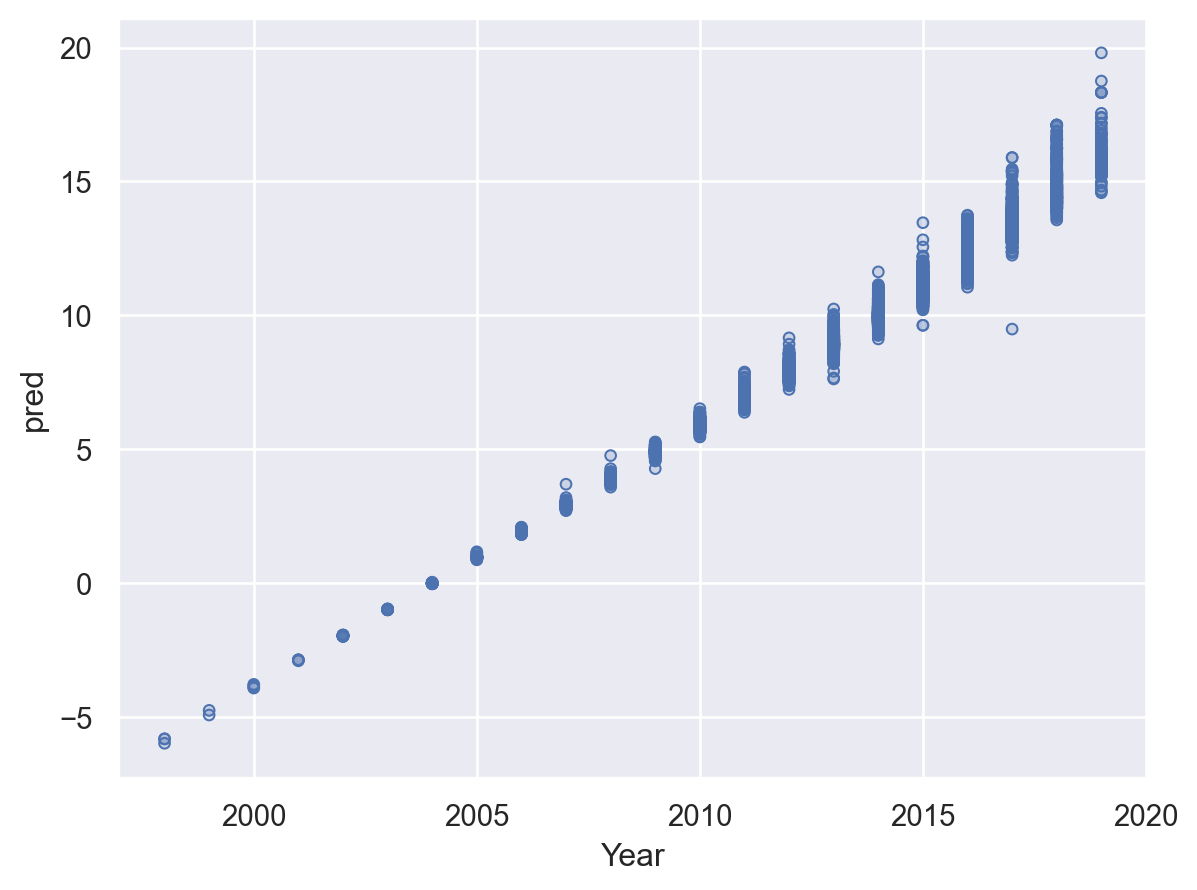

In [49]:
(
    so.Plot(car, x='Year', y='pred')
    .add(so.Dots())
)

연도가 증가할수록, 연식이 낮아질수록 가격이 얼마나 높아지는지 확인

잔차를 분석하였을 때

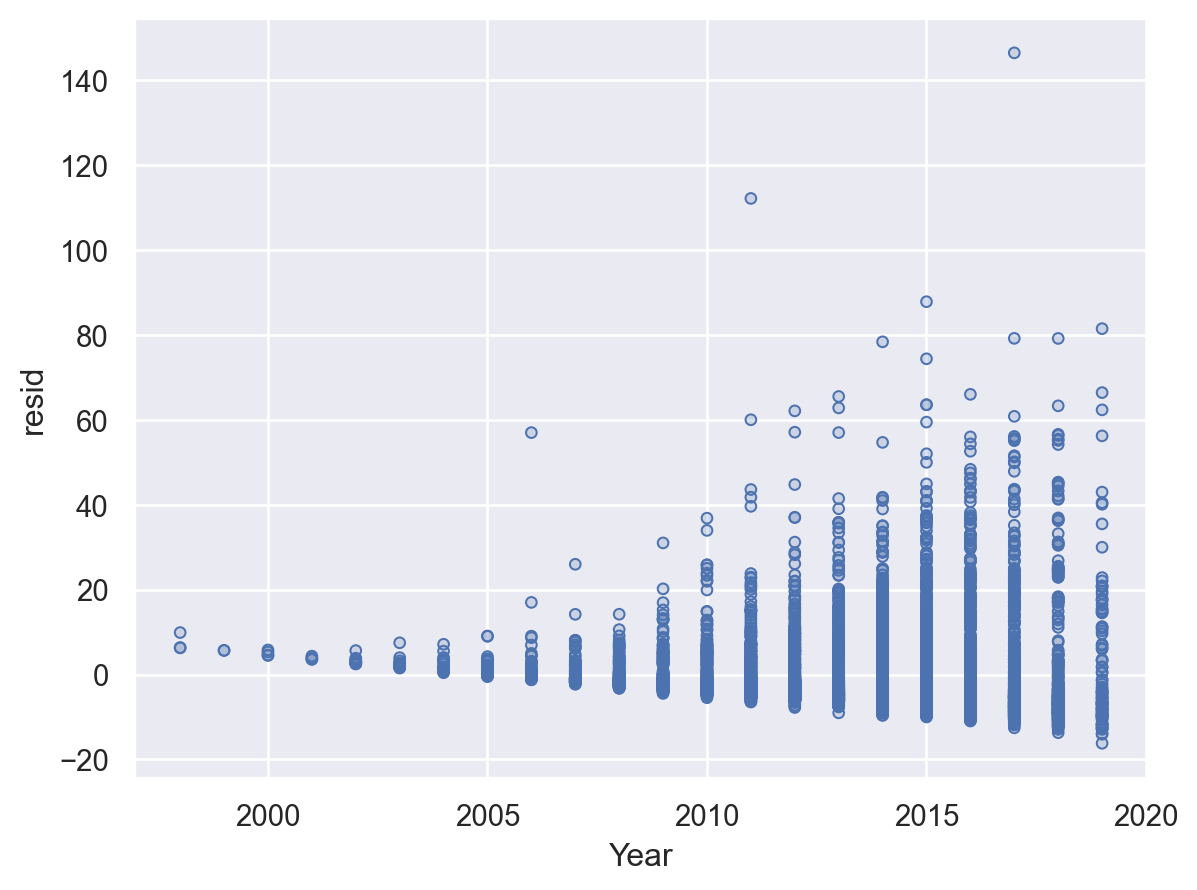

In [50]:
(
    so.Plot(car, x='Year', y='resid')
    .add(so.Dots())
)

연식이 증가할수록 잔차가 큰 것을 확인함

다른 상관관계가 존재하는 것을 확인

다른 상관관계를 추가하여 모델을 생성

In [51]:
mod_second = ols('Price ~ Year * lKilometers * Engine', data=car).fit()

In [52]:
car['resid'] = mod_second.resid
car['pred'] = mod_second.predict(car)

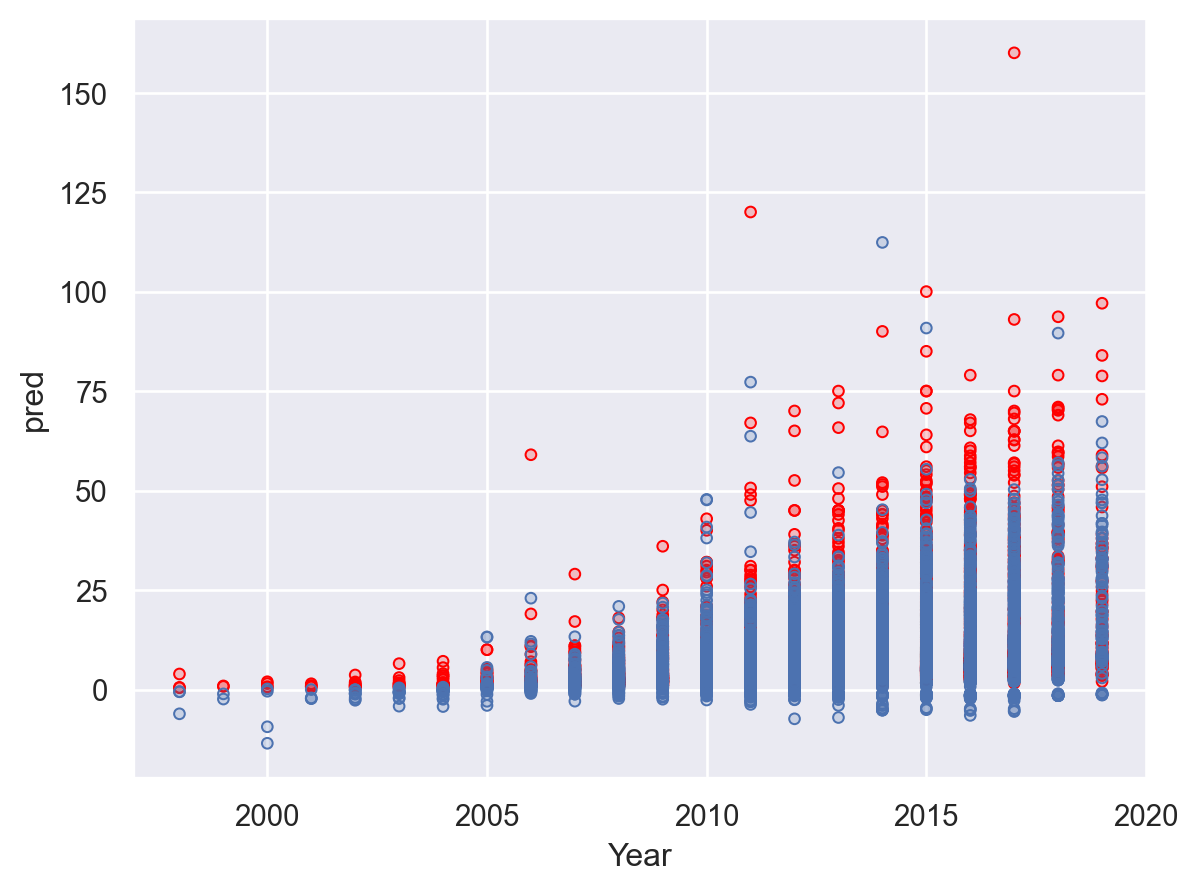

In [53]:
(
    so.Plot(car, x='Year', y='pred')
    .add(so.Dots(color='red'), y='Price')
    .add(so.Dots())
)

가격값이 예측치와 거의 유사한 것을 확인

In [54]:
ref_line = pd.DataFrame({"Year": [1998, 2020], "resid": [0, 0]})

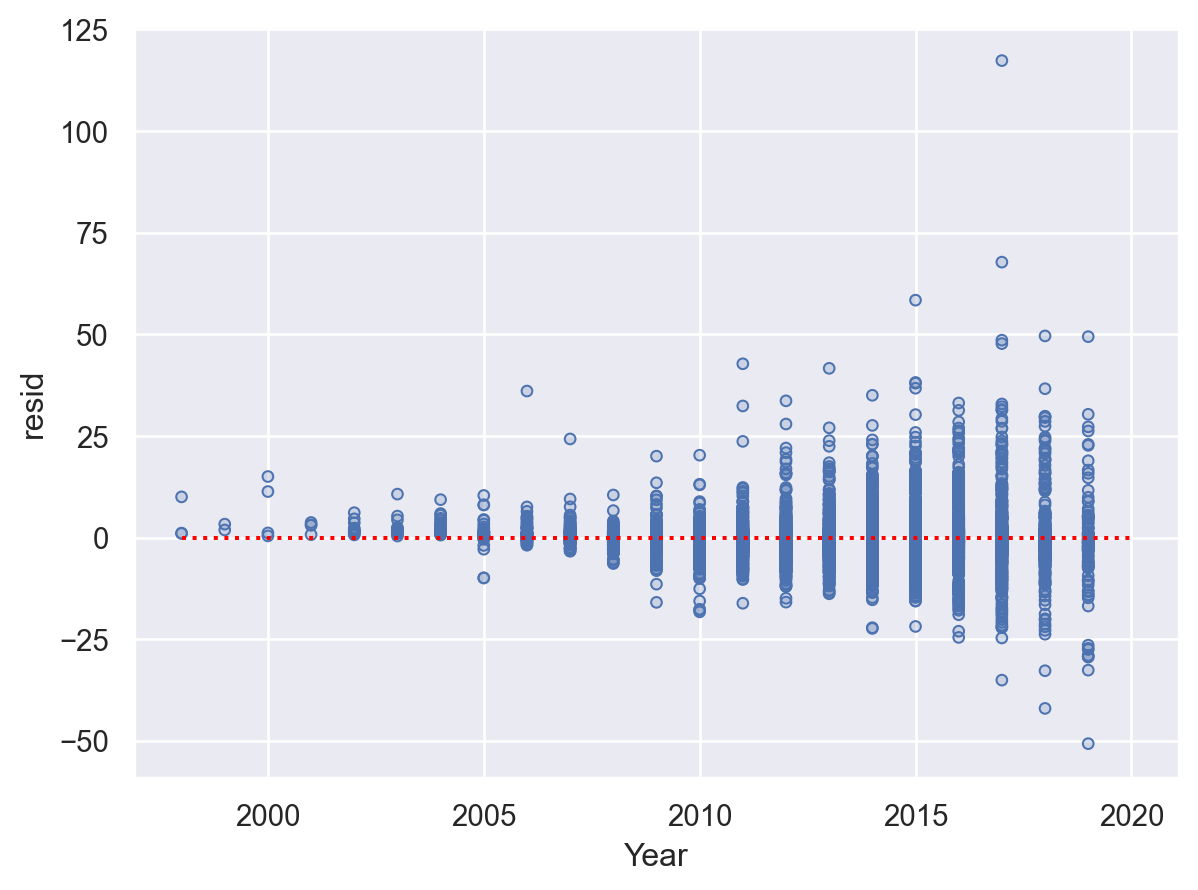

In [55]:
(
    so.Plot(car, x='Year', y='resid')
    .add(so.Dots())
    .add(so.Line(color='red', linestyle=':'), x = ref_line.Year, y = ref_line.resid)
)

엔진에 대한 상관관계를 추가한 결과 잔차가 줄어드는 것을 확인

그럼에도 이상치와 잔차가 큰 값이 존재하는 것을 확인할 수 있음

2000년도 초반에는 잔차의 값이 작으나, 연식이 작아질수록 잔차의 값이 커지는 것을 확인

가격에 영향을 미치는 또 다른 변수가 있는것으로 추측

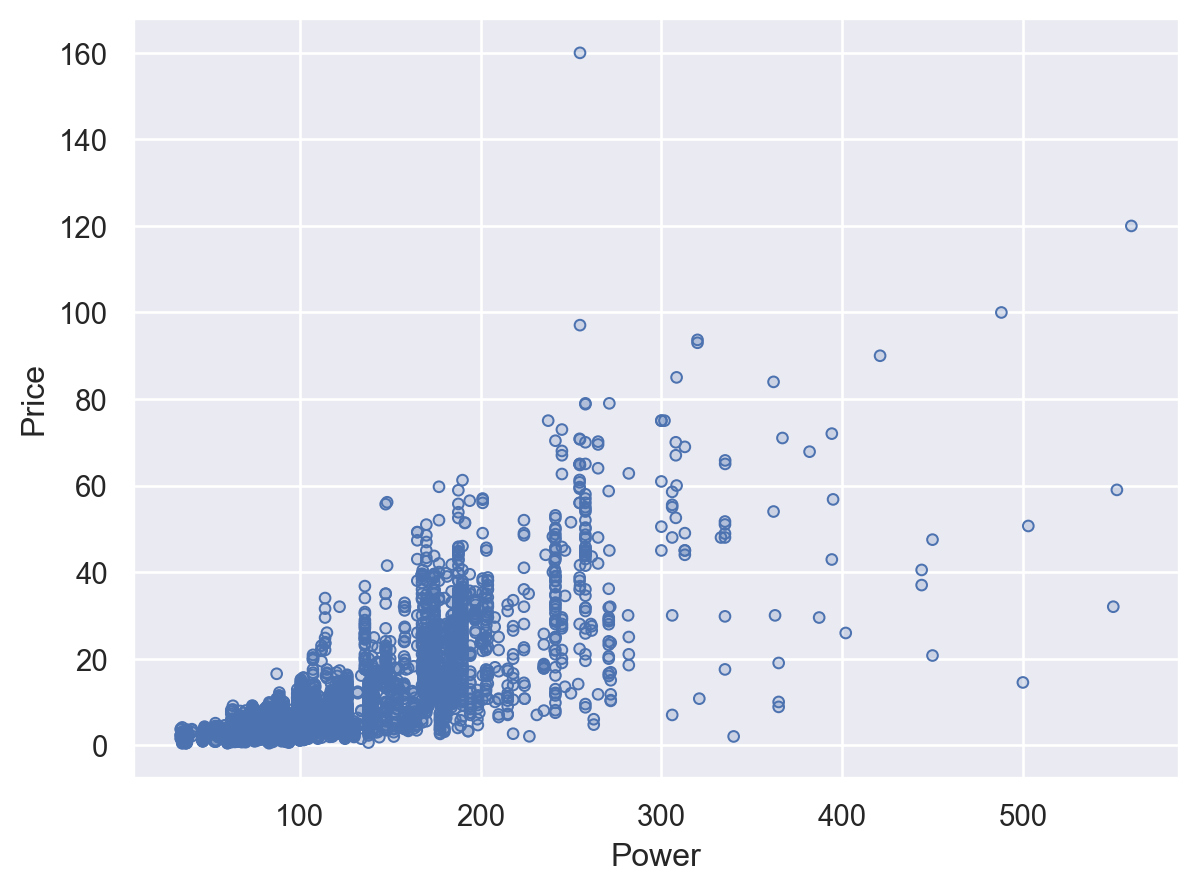

In [56]:
(
    so.Plot(car, x='Power', y='Price')
    .add(so.Dots())
)

Power가 커질 때 가격이 상승하는 경향을 확인

robust regression 모델을 사용하여 Power의 이상치를 줄여 확인

In [57]:
mod_third = sm.RLM.from_formula('Price ~ Year * lKilometers * Engine * Power', data=car).fit()

In [58]:
mod_third.params

Intercept                       -2320.16
Year                                1.14
lKilometers                       157.88
Year:lKilometers                   -0.08
Engine                              3.53
                                  ...   
Year:lKilometers:Power              0.00
Engine:Power                       -0.04
Year:Engine:Power                   0.00
lKilometers:Engine:Power            0.00
Year:lKilometers:Engine:Power      -0.00
Length: 16, dtype: float64

In [59]:
car['resid'] = mod_third.resid
car['pred'] = mod_third.predict(car)

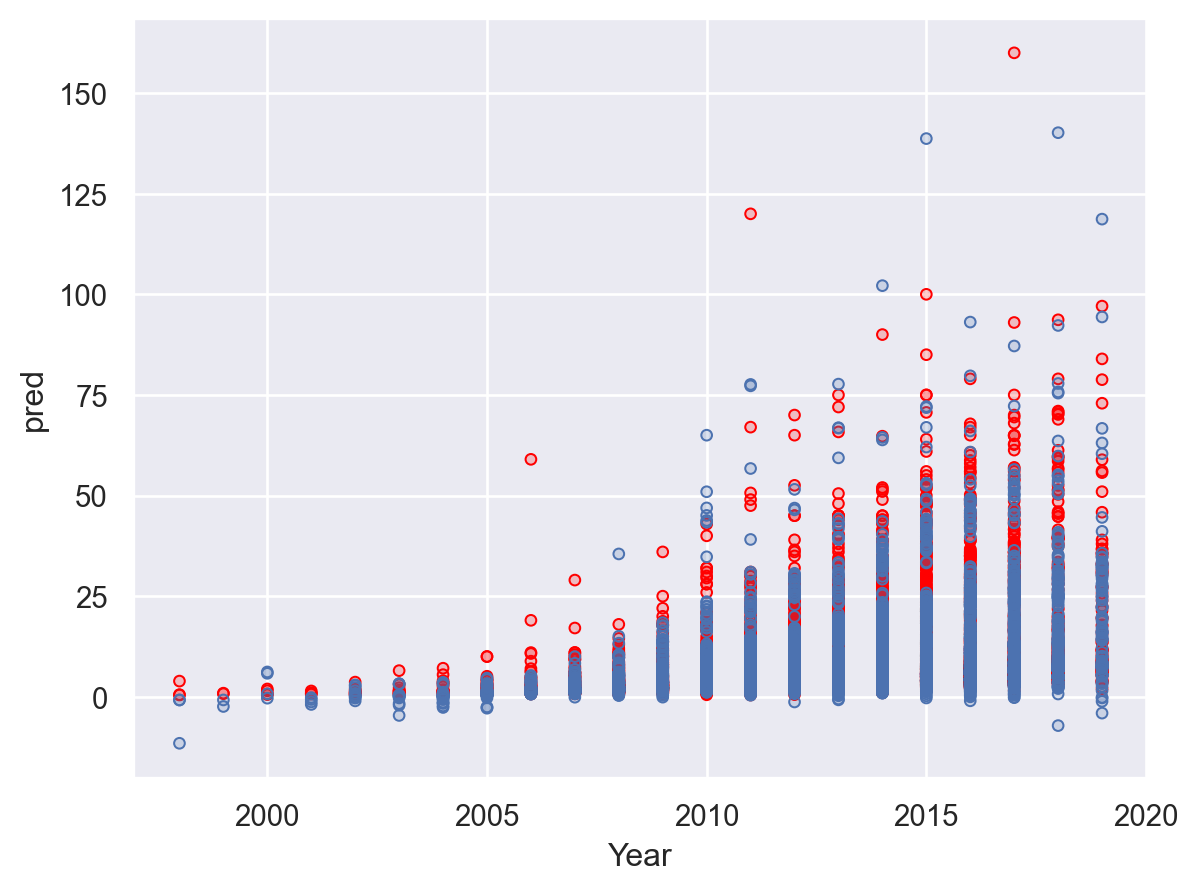

In [60]:
(
    so.Plot(car, x='Year', y='pred')
    .add(so.Dots(color='red'), y='Price')
    .add(so.Dots())
)

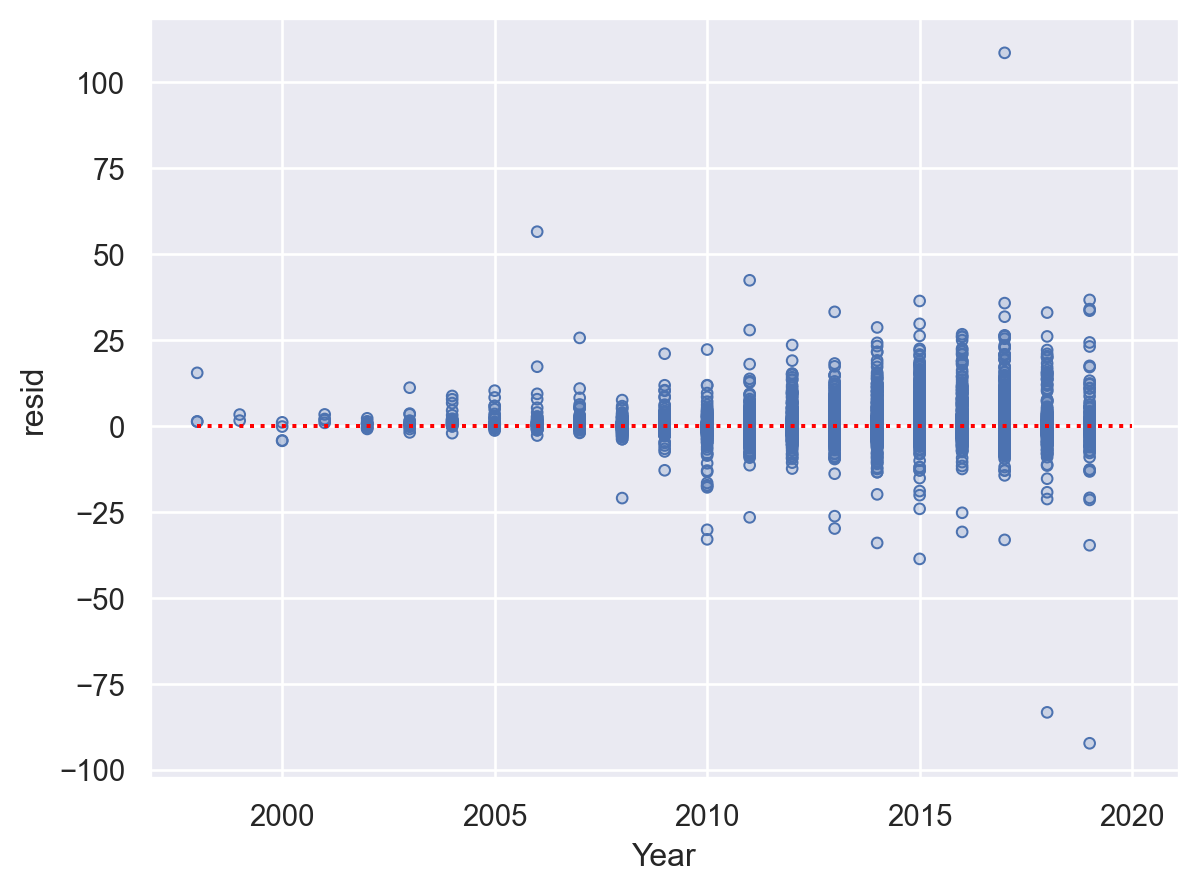

In [61]:
(
    so.Plot(car, x='Year', y='resid')
    .add(so.Dots())
    .add(so.Line(color='red', linestyle=':'), x = ref_line.Year, y = ref_line.resid)
)

잔차의 값이 줄어드는 것을 확인할 수 있음

그럼에도 이상치는 존재함 

해당 이상치를 Owner_Type을 기준으로 확인

In [62]:
mod_fourth = sm.RLM.from_formula('Price ~ Year * lKilometers * Engine * Power * Owner_Type', data=car).fit()

In [63]:
car['resid'] = mod_fourth.resid
car['pred'] = mod_fourth.predict(car)

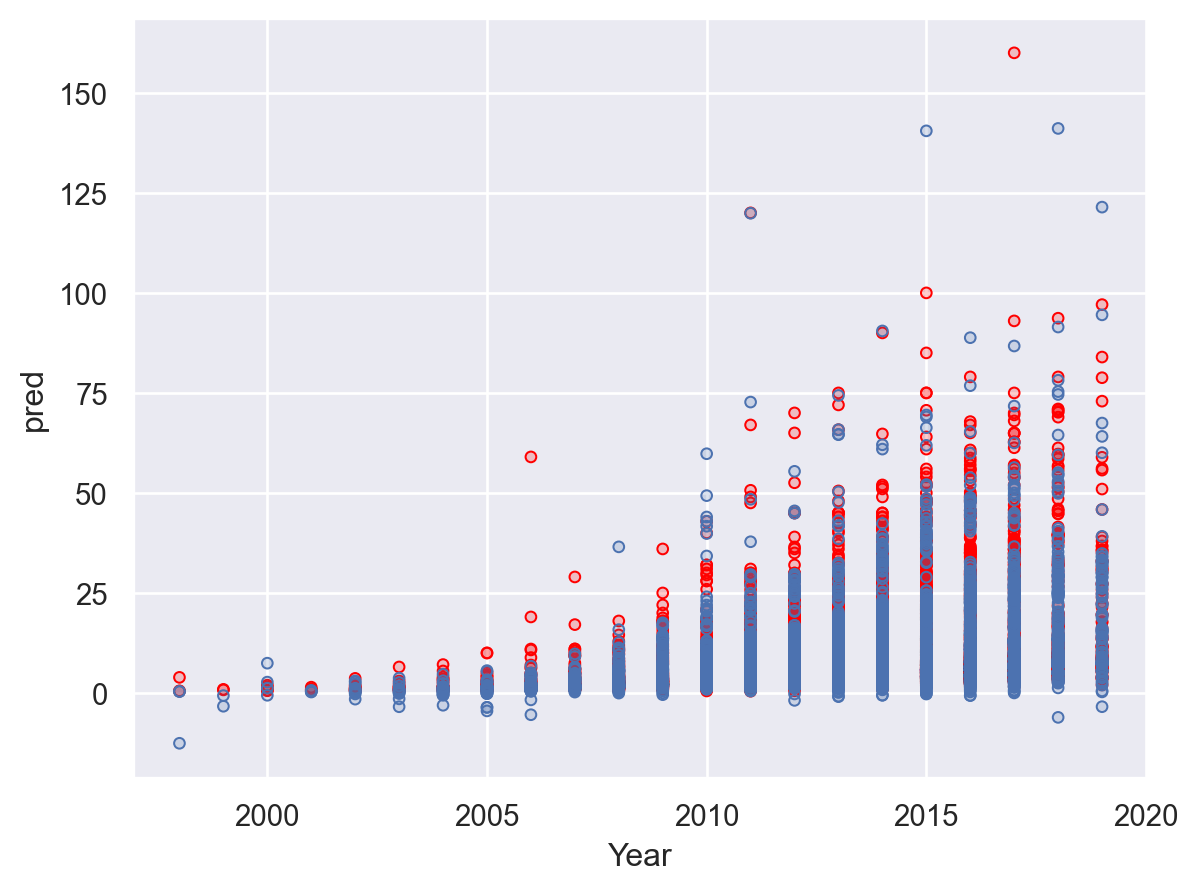

In [64]:
(
    so.Plot(car, x='Year', y='pred')
    .add(so.Dots(color='red'), y='Price')
    .add(so.Dots())
)

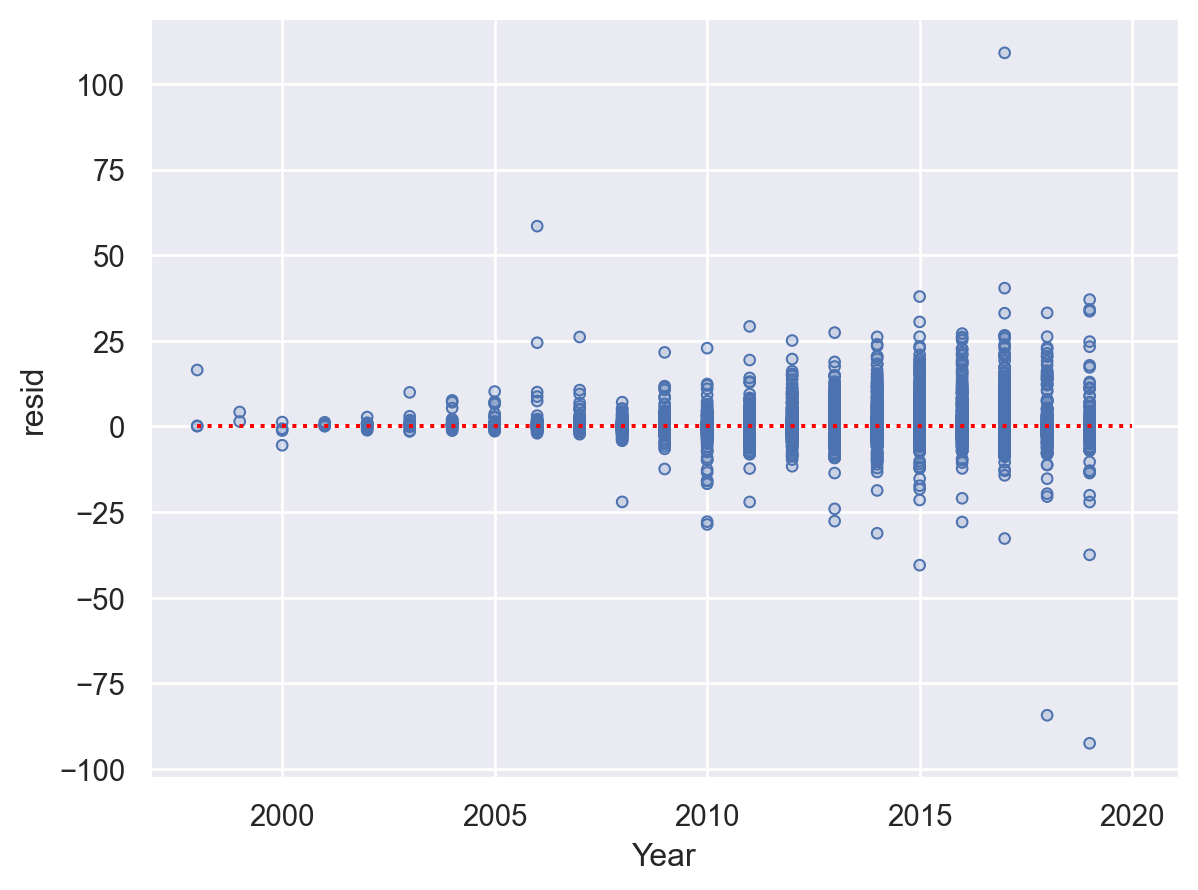

In [65]:
(
    so.Plot(car, x='Year', y='resid')
    .add(so.Dots())
    .add(so.Line(color='red', linestyle=':'), x = ref_line.Year, y = ref_line.resid)
)

Onwer_Type은 큰 영향을 미치지 않는 것으로 판단됨

In [91]:
mod_fifth = sm.RLM.from_formula('Price ~ Year * lKilometers * Engine * Power + Seats', data=car).fit()

In [92]:
car['resid'] = mod_fifth.resid
car['pred'] = mod_fifth.predict(car)

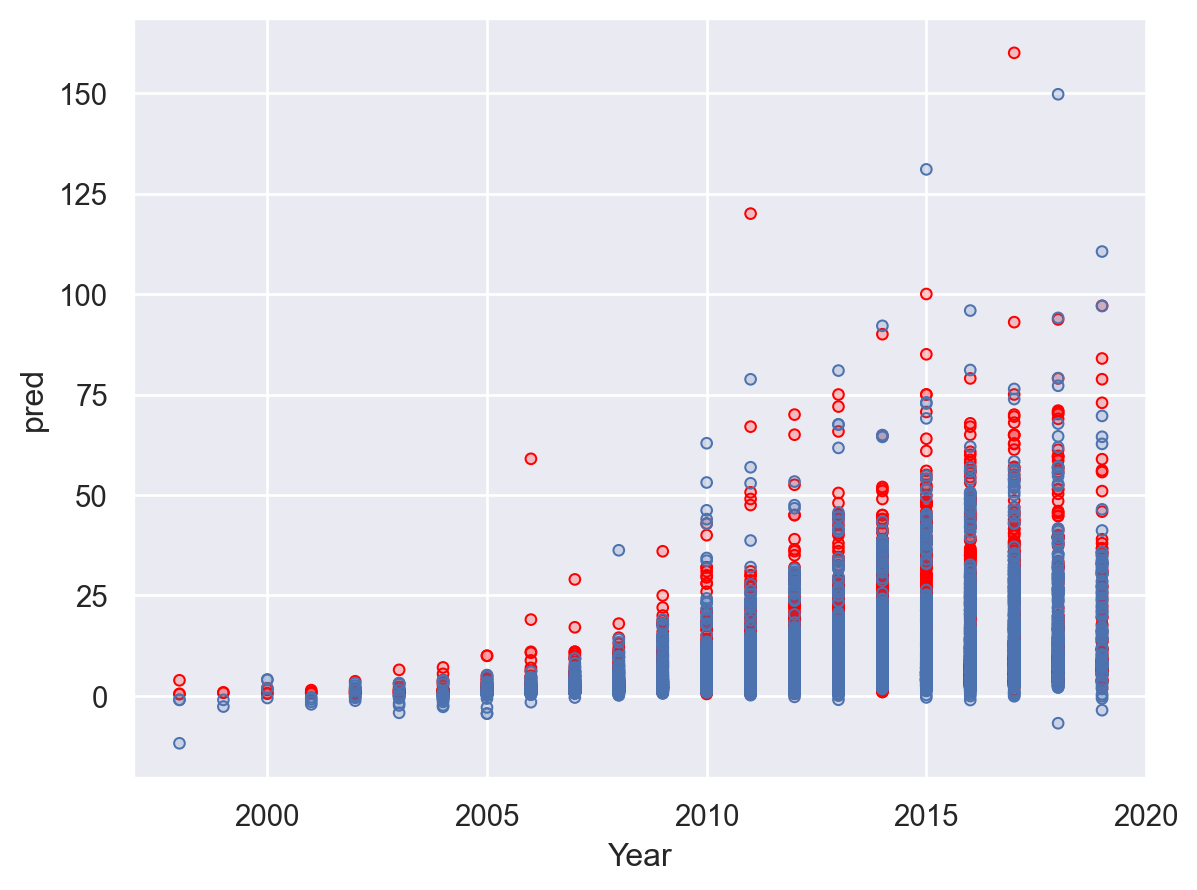

In [93]:
(
    so.Plot(car, x='Year', y='pred')
    .add(so.Dots(color='red'), y='Price')
    .add(so.Dots())
)

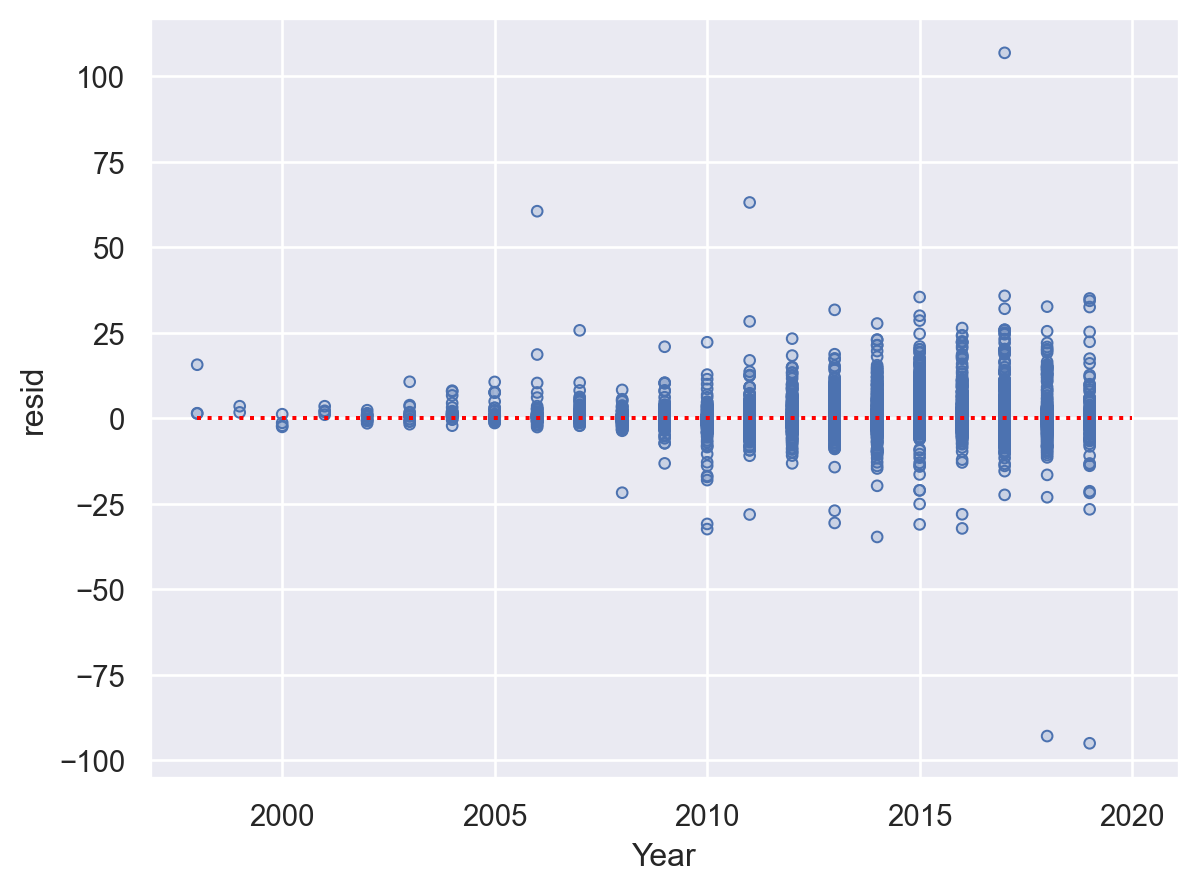

In [94]:
(
    so.Plot(car, x='Year', y='resid')
    .add(so.Dots())
    .add(so.Line(color='red', linestyle=':'), x = ref_line.Year, y = ref_line.resid)
)

이상치가 조금 더 줄어든 것을 확인할 수 있음

# Summary

다음과 같은 분석을 진행했을 때,

시각화를 통해 중고차의 가격은 연식과 큰 관계가 있다는 것으로 판단하여 이를 중점적으로 확인

또한 해당 연식과 주행거리와 상관관계가 있는 것을 확인하여 해당 두 변수를 Interaction으로 추가하여 모델을 생성

실제 값과 예측값을 비교하는 중 이상치가 존재하는 것을 확인

다른 변수가 가격을 형성하는 데 있어서 영향을 크게 미치는 것을 확인할 수 있음

분석을 진행하며 영향을 크게 미치는 변수는 엔진과 파워인 것으로 판단하여 모델을 생성하여 비교한 결과

이상치가 낮아지고 잔차가 줄어드는 현상을 확인함

이상치를 줄이기 위해 Robust Regression을 사용하여 이상치를 줄이고, 이상치를 줄인 데이터를 사용하여 모델을 생성한 결과

잔차가 0과 일치하지는 않지만 가장 가까운 모델을 생성할 수 있었음